In [1]:
# Integration of biopsies and organ donors from 2 studies
import anndata, numpy as np, pandas as pd, imp, lpy, scanpy as sc
sc.logging.print_header()

/opt/conda/lib/python3.7/site-packages/scvi/__init__.py:31: DeprecationWarning: scvi is deprecated, please uninstall scvi via `pip uninstall scvi` and install the new scvi-tools package at github.com/YosefLab/scvi-tools
  warnings.warn(deprecation_msg, DeprecationWarning)


scanpy==1.6.0 anndata==0.7.5 umap==0.3.10 numpy==1.18.1 scipy==1.5.4 pandas==1.0.1 scikit-learn==0.22.2 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1 leidenalg==0.8.3


In [2]:
# Set some constants
adata = anndata.read_h5ad("N1-integrated_donors.h5ad")

In [3]:
adata.obs["broad_celltypes"] =  lpy.applyFactorRename(adata.obs["leidenres2_scvi_sampl_cc"],{
    tuple(["6","14"]) : "Epithelial",
    tuple(["1", "11"]) : "Endothelial",
    tuple(["12", "9", "2", "8"]) : "Immune",
    tuple(["4", "3", "2", "8"]) : "Supporting",
    tuple(["0", "7"]) : "Stromal",      
    tuple(["15","17", "5", "10", "18", "16", "20", "13", "19"]) : "Excluded"      
    }, doinspect=True)
adata.obs["broad_celltypes"].value_counts()

Rename classes in list
def applyFactorRename(input, dico, doinspect = False):
    if doinspect is True: print("\033Rename classes in list\033\033"); print(inspect.getsource(applyFactorRename));
    import numpy as np
    tmp = np.array(input, dtype=object)
    out = tmp.copy()
    for k,x in dico.items():
        if isinstance(k, tuple):
            for l in k:
                out[tmp == l] = x
        else:
            out[tmp == k] = x
    leftover_categories = set(out)
    leftover_categories = leftover_categories.difference(set(dico.values()))
    categories = list(dico.values())
    categories = categories + list(leftover_categories)
    return(pd.Categorical(out, categories, ordered=True))



Supporting     30028
Stromal        23055
Endothelial    14254
filtered       10545
Excluded        7540
Epithelial      4246
Immune          4055
Name: broad_celltypes, dtype: int64

In [4]:
imp.reload(lpy)
adata.obs["general_celltypes"] =  lpy.applyFactorRename(adata.obs["leidenres2_scvi_sampl_cc"],{
    "6" : "Epithelial",
    "14" : "Ciliated",
    "9" : "Lymphoid",
    "12" : "Myeloid",
    "11" : "Endothelial ACKR1",
    "1" : "Endothelial SEMA3G",
    "3" : "PV MYH11",
    "4" : "PV STEAP4",
    "2" : "uSMC",
    "8" : "Stromal C7",      
    tuple(["0", "7"]) : "Stromal",
    tuple(["15","17", "5", "10", "18", "16", "20", "13", "19"]) : "Excluded"
    }, doinspect=True)
adata.obs["general_celltypes"].value_counts()
#tuple(["15","17", "5"]) : "specific to A10",
#"10" : "specific to A13",
#"18" : "specific to A16",
#tuple(["16","19","20"]) : "specific to E3",
#"13" : "Low QC"

Rename classes in list
def applyFactorRename(input, dico, doinspect = False):
    if doinspect is True: print("\033Rename classes in list\033\033"); print(inspect.getsource(applyFactorRename));
    import numpy as np
    tmp = np.array(input, dtype=object)
    out = tmp.copy()
    for k,x in dico.items():
        if isinstance(k, tuple):
            for l in k:
                out[tmp == l] = x
        else:
            out[tmp == k] = x
    leftover_categories = set(out)
    leftover_categories = leftover_categories.difference(set(dico.values()))
    categories = list(dico.values())
    categories = categories + list(leftover_categories)
    return(pd.Categorical(out, categories, ordered=True))



Stromal               23055
Endothelial SEMA3G    12941
uSMC                  12731
filtered              10545
PV MYH11               9256
Excluded               7540
PV STEAP4              4690
Epithelial             3835
Stromal C7             3351
Lymphoid               3269
Endothelial ACKR1      1313
Myeloid                 786
Ciliated                411
Name: general_celltypes, dtype: int64

In [5]:
# Add cellcycle phase annotation
adata = lpy.addCycleCycleAnnotation(adata, doinspect=True)

In [6]:
# set default colors for annotations,
adata.uns["SampleID_colors"] = ['#800000', '#a70000', '#e70000', '#a76060', '#e28080', '#4a4a00', '#404030', '#848400', '#707040', '#a5a500', '#909060', '#005917', '#009f29', '#00c734', '#004a75', '#0084d2', '#12a7ff', '#410068', '#7a00c1', '#bb48ff', '#cd79ff']
adata.uns["Location_colors"] = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
adata.uns["Binary Stage_colors"] = ['#008800', '#AA4400']
adata.uns["BiopsyType_colors"] = ['#AA0000', '#0000FF', ]
adata.uns["Location_colors"] = ['#0000FF', '#AA0088', '#888800']
adata.uns["phase_colors"] = ['#6E40AA', '#FF8C38', '#28EA8D']
adata.uns["DonorID_colors"] = ['#a78080', '#a70000', '#e28080', '#e20000', '#4a4a00', '#848400', '#a5a500']

adata.uns["broad_celltypes_colors"] = ['#F08129', '#48B750', '#499ABA', '#999977', '#958054', '#7979CC', '#888888']
adata.uns["general_celltypes_colors"] = ['#9C1915', '#429FD9', '#8B4F9A', '#499ABA', '#48B750', '#274E13', '#7C7C7C', '#C4C4C2', '#A7A7CE', '#776747', '#D6C2A7', '#FFFFFF', '#FFFFFF']

In [7]:
adata.write_h5ad("N2-integrated_donors.h5ad")

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


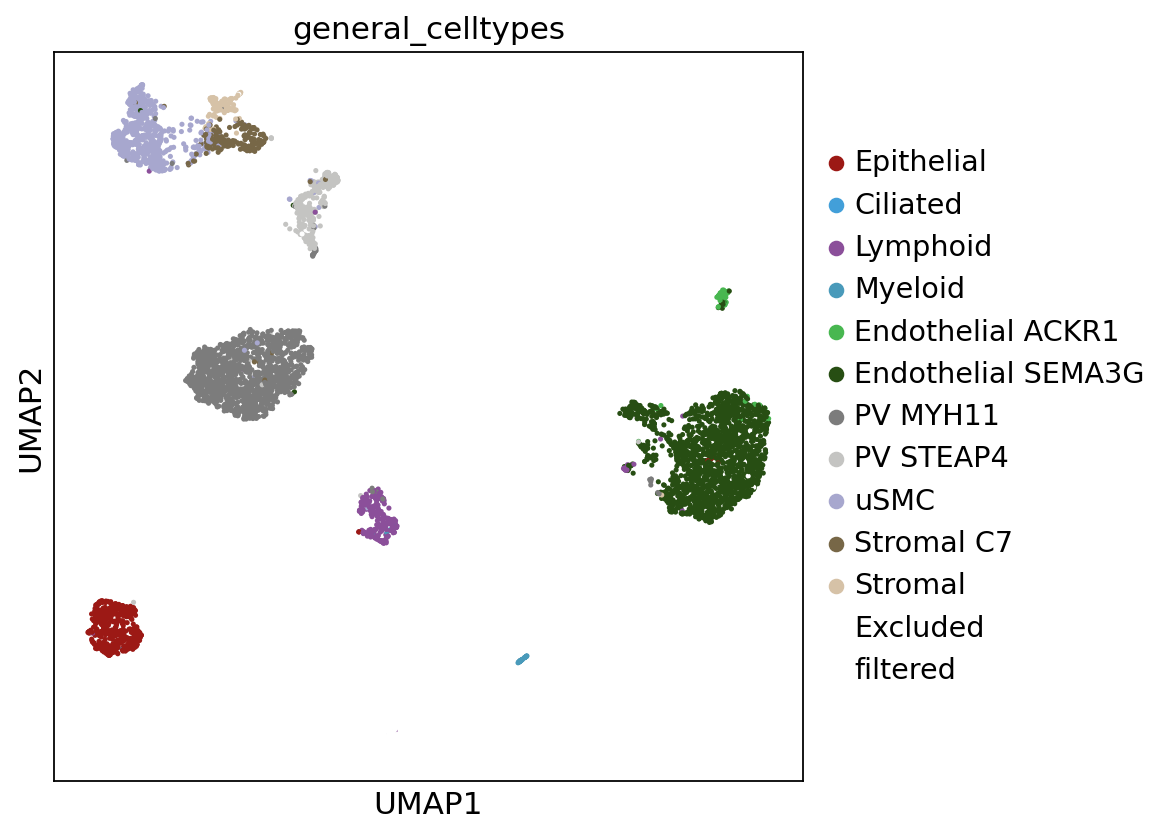

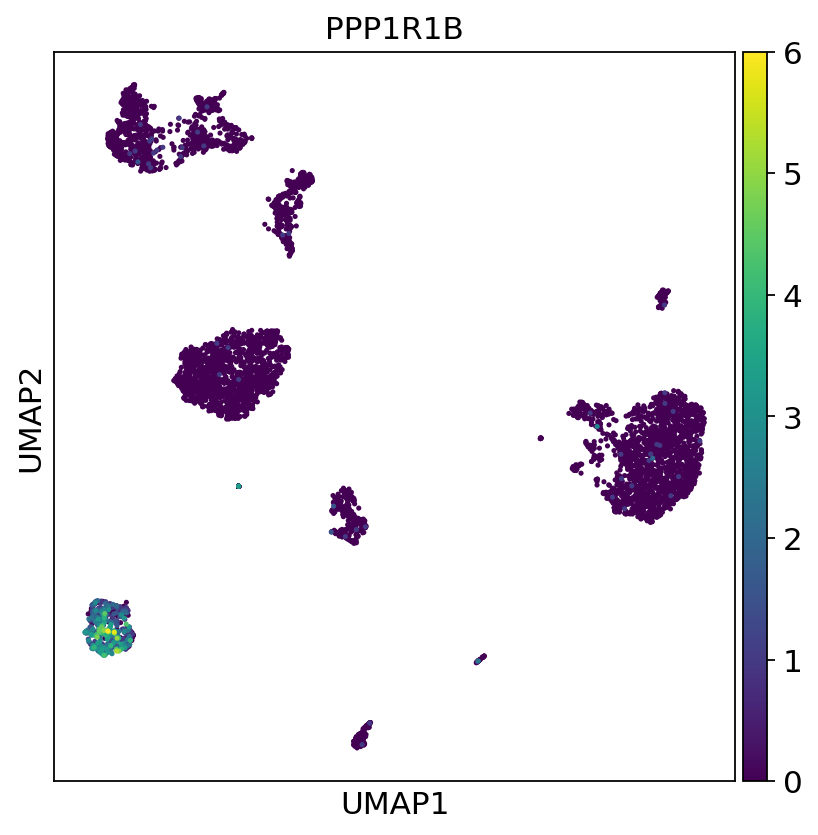

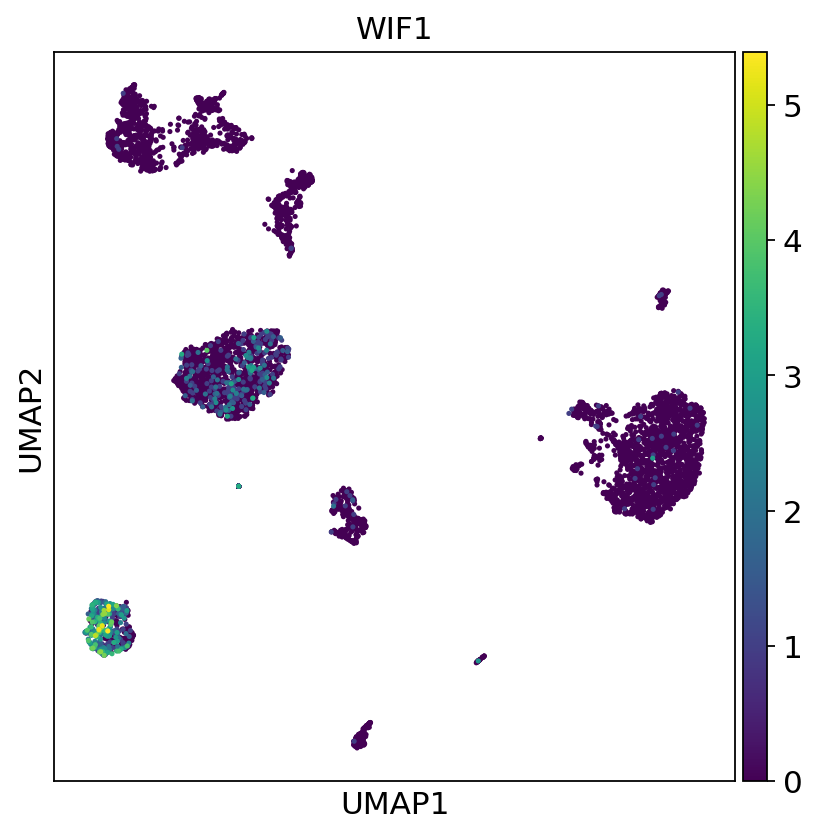

In [8]:
%load_ext rpy2.ipython
%matplotlib inline
sc.set_figure_params(figsize= [6,6])
adata2 = adata[ [ x in ["A16"] for x in adata.obs["DonorID"] ],:]
adata2.obsm["umap"] = adata2.obsm["X_umap_A16_sampl_cc"]
sc.pl.umap(adata2, color=["general_celltypes"], save= "color.pdf", color_map = "viridis")
sc.pl.umap(adata2, color=["PPP1R1B"], save= "overlay.pdf", color_map = "viridis", use_raw = False)
sc.pl.umap(adata2, color=["WIF1"], save= "overlay2.pdf", color_map = "viridis", use_raw = False)

In [9]:
adata = anndata.read_h5ad("N2-integrated_donors.h5ad")